In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import tensorflow as tf
from skimage.color import gray2rgb
import shap
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import img_to_array

In [ ]:


# Load the FashionMNIST dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Preprocess the data
X_train = X_train / 255.0
X_test = X_test / 255.0
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Define the model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [ ]:

# Select two examples
example1_idx = np.argmax(y_test == 0)
example2_idx = np.argmax(y_test == 1)

example1 = X_test[example1_idx]
example2 = X_test[example2_idx]

# Convert grayscale image to RGB
example2_rgb = gray2rgb(example2.reshape(28, 28))

# Make predictions for the examples
example1_pred = model.predict(example1.reshape(1, 28, 28, 1))
example2_pred = model.predict(example2.reshape(1, 28, 28, 1))

# Get the predicted classes and probabilities
example1_class = np.argmax(example1_pred)
example1_prob = example1_pred[0, example1_class]
example1_second_prob = np.sort(example1_pred)[0, -2]
example1_least_prob = np.sort(example1_pred)[0, -1]

example2_class = np.argmax(example2_pred)
example2_prob = example2_pred[0, example2_class]
example2_second_prob = np.sort(example2_pred)[0, -2]
example2_least_prob = np.sort(example2_pred)[0, -1]

print(f"Example 1: True Class - {class_names[0]}")
print(f"           Predicted Class - {class_names[example1_class]}")
print(f"           Probability - {example1_prob:.4f}")
print(f"           Second Most Likely Probability - {example1_second_prob:.4f}")
print(f"           Least Likely Probability - {example1_least_prob:.4f}")
print()
print(f"Example 2: True Class - {class_names[1]}")
print(f"           Predicted Class - {class_names[example2_class]}")
print(f"           Probability - {example2_prob:.4f}")
print(f"           Second Most Likely Probability - {example2_second_prob:.4f}")
print(f"           Least Likely Probability - {example2_least_prob:.4f}")
print()


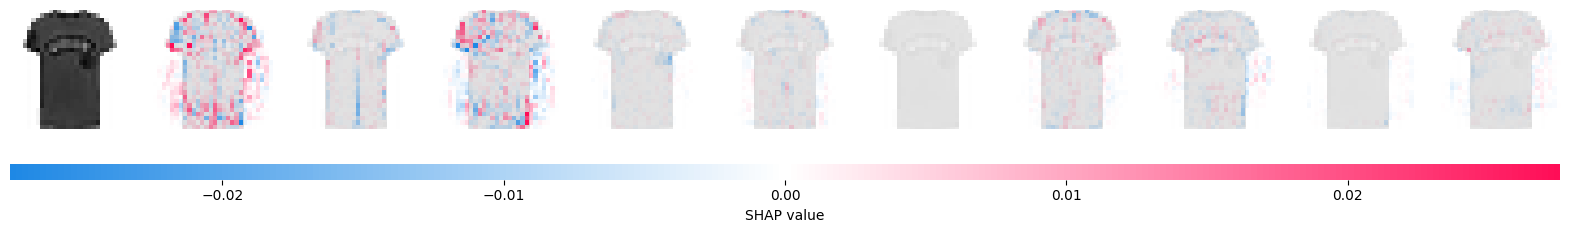

In [14]:

# SHAP Explanation
background = X_train[np.random.choice(X_train.shape[0], 100, replace=False)]
explainer = shap.GradientExplainer(model, background)
shap_values = explainer.shap_values(example1.reshape(1, 28, 28, 1))
shap.image_plot(shap_values, -example1.reshape(1, 28, 28, 1))

Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.


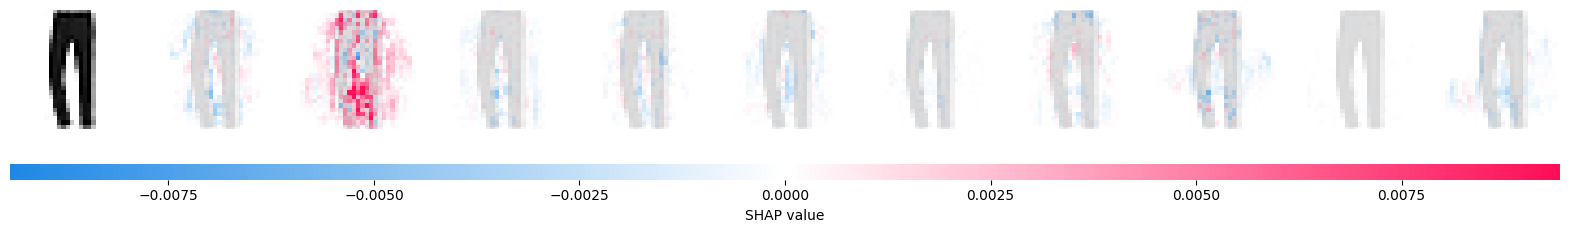

In [15]:
# DeepLIFT Explanation
explainer = shap.DeepExplainer(model, background)
deeplift_values = explainer.shap_values(example2.reshape(1, 28, 28, 1))
shap.image_plot(deeplift_values, -example2.reshape(1, 28, 28, 1))

`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


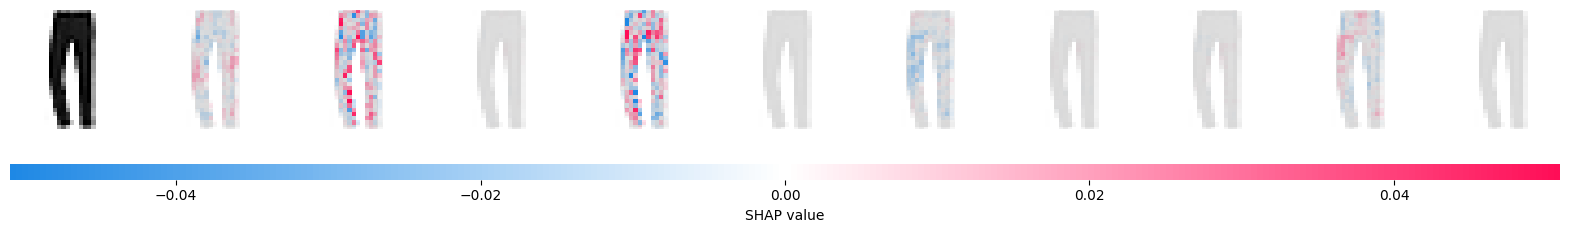

In [13]:
# Integrated Gradients Explanation
baseline = np.zeros_like(example2).reshape(1, 28, 28, 1)
explainer = shap.GradientExplainer(model, baseline)
shap_values = explainer.shap_values(example2.reshape(1, 28, 28, 1))
shap.image_plot(shap_values, -example2.reshape(1, 28, 28, 1))